## contents
### 01 import libraries & data
### 02 wrangle data
a) find (Haversine formula) distance between construction start and airport
b) create a variable 'project_time_length'
c) revisit questions

### 03 visualizations
a) correlation matrix heatmap
b) scatterplot
c) pair plot
d) categorical plot

# 01 import libraries & data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import math

In [2]:
#create path
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A6 - Adv. Analytics & Dashboard Design\Project A6'

In [3]:
#import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'merged2.csv'), index_col = False)

# 02 wrangle data

In [4]:
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Wind_Direction,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,Airport_Lat,Airport_Lng
0,C-2,2,30.221330,-92.008620,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,...,CALM,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,30.2053,-91.9876
1,C-3,2,39.653152,-104.910225,0.192266,Denver,Denver,CO,US/Mountain,KBKF,...,WSW,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,39.7017,-104.7520
2,C-4,4,33.961506,-118.029340,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,...,CALM,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,33.8720,-117.9800
3,C-5,2,40.008736,-79.599690,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,...,SSW,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,40.2759,-79.4048
4,C-6,2,32.811620,-96.853140,0.747595,Dallas,Dallas,TX,US/Central,KDAL,...,SSE,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,32.8471,-96.8518


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153650 entries, 0 to 5153649
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           int64  
 2   Start_Lat          float64
 3   Start_Lng          float64
 4   Distance(mi)       float64
 5   City               object 
 6   County             object 
 7   State              object 
 8   Timezone           object 
 9   Airport_Code       object 
 10  Weather_Timestamp  object 
 11  Temperature(F)     float64
 12  Visibility(mi)     float64
 13  Wind_Direction     object 
 14  Precipitation(in)  float64
 15  Weather_Condition  object 
 16  Start_Time_no_ext  object 
 17  End_Time_no_ext    object 
 18  Zipcode_no_ext     int64  
 19  Airport_Type       object 
 20  Airport_Name       object 
 21  Airport_Lat        float64
 22  Airport_Lng        float64
dtypes: float64(8), int64(2), object(13)
memory usage: 904.3+ MB


In [6]:
#reduce size of memory used by changing types
df = df.astype({
    'Severity': 'uint8',
    'Start_Lat': 'float32',
    'Start_Lng': 'float32',
    'Distance(mi)': 'float32',
    'Temperature(F)': 'float32', 
    'Visibility(mi)': 'float32',
    'Precipitation(in)': 'float32',
    'Zipcode_no_ext': 'uint32',
    'Airport_Lat': 'float32',
    'Airport_Lng': 'float32'
})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153650 entries, 0 to 5153649
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ID                 object 
 1   Severity           uint8  
 2   Start_Lat          float32
 3   Start_Lng          float32
 4   Distance(mi)       float32
 5   City               object 
 6   County             object 
 7   State              object 
 8   Timezone           object 
 9   Airport_Code       object 
 10  Weather_Timestamp  object 
 11  Temperature(F)     float32
 12  Visibility(mi)     float32
 13  Wind_Direction     object 
 14  Precipitation(in)  float32
 15  Weather_Condition  object 
 16  Start_Time_no_ext  object 
 17  End_Time_no_ext    object 
 18  Zipcode_no_ext     uint32 
 19  Airport_Type       object 
 20  Airport_Name       object 
 21  Airport_Lat        float32
 22  Airport_Lng        float32
dtypes: float32(8), object(13), uint32(1), uint8(1)
memory usage: 693.0+ MB


In [8]:
# a)
# find the distance between the construction start site & the airport weather station
# using the haversine formula for distance using latitude/longitude
def distance(lat1, lng1, lat2, lng2):
    radius = 3959 # mi

    dlat = math.radians(abs(lat2-lat1))
    dlng = math.radians(abs(lng2-lng1))
    a = (math.sin(dlat/2)) **2  + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * (math.sin(dlng/2)) **2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [9]:
# create a new variable to show distance
df['dist_to_weather(mi)'] = df.apply(lambda x: distance(x['Start_Lat'], x['Start_Lng'], x['Airport_Lat'], x['Airport_Lng']), axis = 1)

In [10]:
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,Airport_Lat,Airport_Lng,dist_to_weather(mi)
0,C-2,2,30.221331,-92.008621,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,...,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,30.205299,-91.987602,1.673991
1,C-3,2,39.653152,-104.910225,0.192266,Denver,Denver,CO,US/Mountain,KBKF,...,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,39.701698,-104.751999,9.058579
2,C-4,4,33.961506,-118.029343,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,...,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,33.872002,-117.980003,6.800913
3,C-5,2,40.008736,-79.599693,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,...,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,40.275902,-79.404800,21.136875
4,C-6,2,32.811619,-96.853142,0.747595,Dallas,Dallas,TX,US/Central,KDAL,...,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,32.847099,-96.851799,2.452856


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153650 entries, 0 to 5153649
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   object 
 1   Severity             uint8  
 2   Start_Lat            float32
 3   Start_Lng            float32
 4   Distance(mi)         float32
 5   City                 object 
 6   County               object 
 7   State                object 
 8   Timezone             object 
 9   Airport_Code         object 
 10  Weather_Timestamp    object 
 11  Temperature(F)       float32
 12  Visibility(mi)       float32
 13  Wind_Direction       object 
 14  Precipitation(in)    float32
 15  Weather_Condition    object 
 16  Start_Time_no_ext    object 
 17  End_Time_no_ext      object 
 18  Zipcode_no_ext       uint32 
 19  Airport_Type         object 
 20  Airport_Name         object 
 21  Airport_Lat          float32
 22  Airport_Lng          float32
 23  dist_to_weather(mi)  float64
dty

In [12]:
df.shape

(5153650, 24)

In [13]:
#b) create a column/variable 'project_time_length'
start = pd.to_datetime(df['Start_Time_no_ext'])
end = pd.to_datetime(df['End_Time_no_ext'])
df['project_time_length'] = end - start

In [14]:
df.shape

(5153650, 25)

In [15]:
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,Airport_Lat,Airport_Lng,dist_to_weather(mi),project_time_length
0,C-2,2,30.221331,-92.008621,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,...,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,30.205299,-91.987602,1.673991,0 days 00:23:30
1,C-3,2,39.653152,-104.910225,0.192266,Denver,Denver,CO,US/Mountain,KBKF,...,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,39.701698,-104.751999,9.058579,0 days 02:01:25
2,C-4,4,33.961506,-118.029343,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,...,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,33.872002,-117.980003,6.800913,7 days 21:12:50
3,C-5,2,40.008736,-79.599693,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,...,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,40.275902,-79.404800,21.136875,1 days 05:06:54
4,C-6,2,32.811619,-96.853142,0.747595,Dallas,Dallas,TX,US/Central,KDAL,...,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,32.847099,-96.851799,2.452856,0 days 00:29:00


In [16]:
#duplicate time difference column to separate out the time in minutes
df['Minutes_diff'] = df['project_time_length']

In [17]:
df['Minutes_diff']=df['Minutes_diff'].astype('str')

In [18]:
# split the project time length into days and hours:minutes:seconds
df[['days', 'word', 'minutes']]= df['Minutes_diff'].str.split(' ', expand=True)

In [19]:
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Airport_Type,Airport_Name,Airport_Lat,Airport_Lng,dist_to_weather(mi),project_time_length,Minutes_diff,days,word,minutes
0,C-2,2,30.221331,-92.008621,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,...,large_airport,Lafayette Regional Airport,30.205299,-91.987602,1.673991,0 days 00:23:30,0 days 00:23:30,0,days,00:23:30
1,C-3,2,39.653152,-104.910225,0.192266,Denver,Denver,CO,US/Mountain,KBKF,...,medium_airport,Buckley Air Force Base,39.701698,-104.751999,9.058579,0 days 02:01:25,0 days 02:01:25,0,days,02:01:25
2,C-4,4,33.961506,-118.029343,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,...,small_airport,Fullerton Municipal Airport,33.872002,-117.980003,6.800913,7 days 21:12:50,7 days 21:12:50,7,days,21:12:50
3,C-5,2,40.008736,-79.599693,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,...,medium_airport,Arnold Palmer Regional Airport,40.275902,-79.404800,21.136875,1 days 05:06:54,1 days 05:06:54,1,days,05:06:54
4,C-6,2,32.811619,-96.853142,0.747595,Dallas,Dallas,TX,US/Central,KDAL,...,large_airport,Dallas Love Field,32.847099,-96.851799,2.452856,0 days 00:29:00,0 days 00:29:00,0,days,00:29:00


In [20]:
#omit the column 'word' with label "days"
df.drop(columns = ['word'], inplace = True)

In [21]:
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Zipcode_no_ext,Airport_Type,Airport_Name,Airport_Lat,Airport_Lng,dist_to_weather(mi),project_time_length,Minutes_diff,days,minutes
0,C-2,2,30.221331,-92.008621,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,...,70501,large_airport,Lafayette Regional Airport,30.205299,-91.987602,1.673991,0 days 00:23:30,0 days 00:23:30,0,00:23:30
1,C-3,2,39.653152,-104.910225,0.192266,Denver,Denver,CO,US/Mountain,KBKF,...,80224,medium_airport,Buckley Air Force Base,39.701698,-104.751999,9.058579,0 days 02:01:25,0 days 02:01:25,0,02:01:25
2,C-4,4,33.961506,-118.029343,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,...,90605,small_airport,Fullerton Municipal Airport,33.872002,-117.980003,6.800913,7 days 21:12:50,7 days 21:12:50,7,21:12:50
3,C-5,2,40.008736,-79.599693,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,...,15425,medium_airport,Arnold Palmer Regional Airport,40.275902,-79.404800,21.136875,1 days 05:06:54,1 days 05:06:54,1,05:06:54
4,C-6,2,32.811619,-96.853142,0.747595,Dallas,Dallas,TX,US/Central,KDAL,...,75247,large_airport,Dallas Love Field,32.847099,-96.851799,2.452856,0 days 00:29:00,0 days 00:29:00,0,00:29:00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153650 entries, 0 to 5153649
Data columns (total 28 columns):
 #   Column               Dtype          
---  ------               -----          
 0   ID                   object         
 1   Severity             uint8          
 2   Start_Lat            float32        
 3   Start_Lng            float32        
 4   Distance(mi)         float32        
 5   City                 object         
 6   County               object         
 7   State                object         
 8   Timezone             object         
 9   Airport_Code         object         
 10  Weather_Timestamp    object         
 11  Temperature(F)       float32        
 12  Visibility(mi)       float32        
 13  Wind_Direction       object         
 14  Precipitation(in)    float32        
 15  Weather_Condition    object         
 16  Start_Time_no_ext    object         
 17  End_Time_no_ext      object         
 18  Zipcode_no_ext       uint32         
 19  

In [23]:
#change 'days' column into unsigned integer32 be smaller and able to apply math
df = df.astype({
    'days' : 'uint32'
    })

In [24]:
#change days to total minutes
df['days_minutes'] = df.apply(lambda a: (a['days'] * 1440), axis = 1)

In [25]:
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Airport_Type,Airport_Name,Airport_Lat,Airport_Lng,dist_to_weather(mi),project_time_length,Minutes_diff,days,minutes,days_minutes
0,C-2,2,30.221331,-92.008621,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,...,large_airport,Lafayette Regional Airport,30.205299,-91.987602,1.673991,0 days 00:23:30,0 days 00:23:30,0,00:23:30,0
1,C-3,2,39.653152,-104.910225,0.192266,Denver,Denver,CO,US/Mountain,KBKF,...,medium_airport,Buckley Air Force Base,39.701698,-104.751999,9.058579,0 days 02:01:25,0 days 02:01:25,0,02:01:25,0
2,C-4,4,33.961506,-118.029343,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,...,small_airport,Fullerton Municipal Airport,33.872002,-117.980003,6.800913,7 days 21:12:50,7 days 21:12:50,7,21:12:50,10080
3,C-5,2,40.008736,-79.599693,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,...,medium_airport,Arnold Palmer Regional Airport,40.275902,-79.404800,21.136875,1 days 05:06:54,1 days 05:06:54,1,05:06:54,1440
4,C-6,2,32.811619,-96.853142,0.747595,Dallas,Dallas,TX,US/Central,KDAL,...,large_airport,Dallas Love Field,32.847099,-96.851799,2.452856,0 days 00:29:00,0 days 00:29:00,0,00:29:00,0


In [26]:
#split up the "minutes" column to change all to minutes later...
df[['hr', 'min', 'sec']]= df['minutes'].str.split(':', expand=True)

In [27]:
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Airport_Lng,dist_to_weather(mi),project_time_length,Minutes_diff,days,minutes,days_minutes,hr,min,sec
0,C-2,2,30.221331,-92.008621,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,...,-91.987602,1.673991,0 days 00:23:30,0 days 00:23:30,0,00:23:30,0,00,23,30
1,C-3,2,39.653152,-104.910225,0.192266,Denver,Denver,CO,US/Mountain,KBKF,...,-104.751999,9.058579,0 days 02:01:25,0 days 02:01:25,0,02:01:25,0,02,01,25
2,C-4,4,33.961506,-118.029343,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,...,-117.980003,6.800913,7 days 21:12:50,7 days 21:12:50,7,21:12:50,10080,21,12,50
3,C-5,2,40.008736,-79.599693,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,...,-79.404800,21.136875,1 days 05:06:54,1 days 05:06:54,1,05:06:54,1440,05,06,54
4,C-6,2,32.811619,-96.853142,0.747595,Dallas,Dallas,TX,US/Central,KDAL,...,-96.851799,2.452856,0 days 00:29:00,0 days 00:29:00,0,00:29:00,0,00,29,00


In [28]:
# cannot math manipulate unless numbers, so...
df = df.astype({
    'hr' : 'uint32',
    'min' : 'uint32',
    'sec' : 'uint32'
    })

In [29]:
#change hours into total minutes
df['hr_minutes'] = df.apply(lambda b: (b['hr'] * 60), axis = 1)

In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153650 entries, 0 to 5153649
Data columns (total 33 columns):
 #   Column               Dtype          
---  ------               -----          
 0   ID                   object         
 1   Severity             uint8          
 2   Start_Lat            float32        
 3   Start_Lng            float32        
 4   Distance(mi)         float32        
 5   City                 object         
 6   County               object         
 7   State                object         
 8   Timezone             object         
 9   Airport_Code         object         
 10  Weather_Timestamp    object         
 11  Temperature(F)       float32        
 12  Visibility(mi)       float32        
 13  Wind_Direction       object         
 14  Precipitation(in)    float32        
 15  Weather_Condition    object         
 16  Start_Time_no_ext    object         
 17  End_Time_no_ext      object         
 18  Zipcode_no_ext       uint32         
 19  

In [31]:
#change seconds into total minutes(will be decimals here)
df['sec_minutes'] = df.apply(lambda c: (c['sec'] / 60), axis = 1)

In [32]:
#make new column to total all minutes taken to complete the construction
df['const_total_minutes'] = df.apply(lambda d: (d['days_minutes'] + d['hr_minutes'] + d['min'] + d['sec_minutes']), axis = 1)

In [33]:
df.head()

,ID,Severity,Start_Lat,Start_Lng,Distance(mi),City,County,State,Timezone,Airport_Code,...,Minutes_diff,days,minutes,days_minutes,hr,min,sec,hr_minutes,sec_minutes,const_total_minutes
0,C-2,2,30.221331,-92.008621,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,...,0 days 00:23:30,0,00:23:30,0,0,23,30,0,0.500000,23.500000
1,C-3,2,39.653152,-104.910225,0.192266,Denver,Denver,CO,US/Mountain,KBKF,...,0 days 02:01:25,0,02:01:25,0,2,1,25,120,0.416667,121.416667
2,C-4,4,33.961506,-118.029343,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,...,7 days 21:12:50,7,21:12:50,10080,21,12,50,1260,0.833333,11352.833333
3,C-5,2,40.008736,-79.599693,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,...,1 days 05:06:54,1,05:06:54,1440,5,6,54,300,0.900000,1746.900000
4,C-6,2,32.811619,-96.853142,0.747595,Dallas,Dallas,TX,US/Central,KDAL,...,0 days 00:29:00,0,00:29:00,0,0,29,0,0,0.000000,29.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153650 entries, 0 to 5153649
Data columns (total 35 columns):
 #   Column               Dtype          
---  ------               -----          
 0   ID                   object         
 1   Severity             uint8          
 2   Start_Lat            float32        
 3   Start_Lng            float32        
 4   Distance(mi)         float32        
 5   City                 object         
 6   County               object         
 7   State                object         
 8   Timezone             object         
 9   Airport_Code         object         
 10  Weather_Timestamp    object         
 11  Temperature(F)       float32        
 12  Visibility(mi)       float32        
 13  Wind_Direction       object         
 14  Precipitation(in)    float32        
 15  Weather_Condition    object         
 16  Start_Time_no_ext    object         
 17  End_Time_no_ext      object         
 18  Zipcode_no_ext       uint32         
 19  

In [35]:
#drop all of the intermediate columns that do not have values that I'll be using
df.drop(['Start_Lat','Start_Lng', 'Airport_Lat', 'Airport_Lng', 'Minutes_diff', 'days', 'minutes', 'days_minutes', 'hr', 'min', 'sec', 'hr_minutes', 'sec_minutes'], axis = 1, inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153650 entries, 0 to 5153649
Data columns (total 22 columns):
 #   Column               Dtype          
---  ------               -----          
 0   ID                   object         
 1   Severity             uint8          
 2   Distance(mi)         float32        
 3   City                 object         
 4   County               object         
 5   State                object         
 6   Timezone             object         
 7   Airport_Code         object         
 8   Weather_Timestamp    object         
 9   Temperature(F)       float32        
 10  Visibility(mi)       float32        
 11  Wind_Direction       object         
 12  Precipitation(in)    float32        
 13  Weather_Condition    object         
 14  Start_Time_no_ext    object         
 15  End_Time_no_ext      object         
 16  Zipcode_no_ext       uint32         
 17  Airport_Type         object         
 18  Airport_Name         object         
 19  

In [37]:
df.shape

(5153650, 22)

In [38]:
#export clean, merged, wrangled data
df.to_csv(os.path.join(path, '02 Data', 'Prepared', 'merged3.csv'), index = False)


# 03 visualizations
## a) correlations 

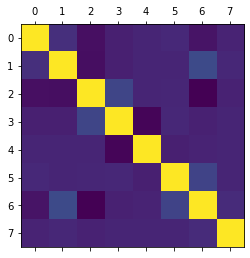

In [39]:
plt.matshow(df.corr())
plt.show()

 There does not seem to be a correlation between the variables shown.

In [40]:
#subset dataframe for heatmap
df1 = df[['Severity', 'Distance(mi)', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 'dist_to_weather(mi)', 'const_total_minutes']]

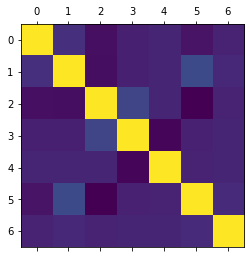

In [41]:
plt.matshow(df1.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

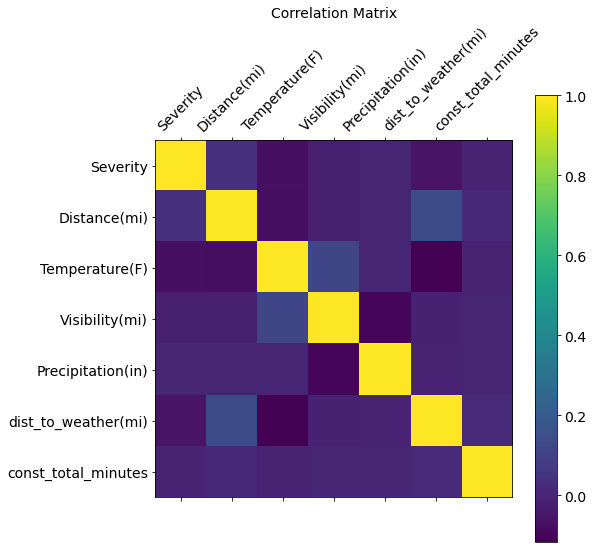

In [42]:
#add labels, legend & change size of heatmap
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8,8)) #figure size
plt.matshow(df1.corr(), fignum=f.number) #type of plot
plt.xticks(range(df1.shape[1]), df1.columns, fontsize = 14, rotation = 45) #xaxis labels
plt.yticks(range(df1.shape[1]), df1.columns, fontsize = 14), #yaxis labels
cb = plt.colorbar() #add a color legend aka 'colorbar'
cb.ax.tick_params(labelsize = 14) 
plt.title('Correlation Matrix', fontsize = 14) #title of whole thing


There does not appear to be correlation between the variables shown, as all of the heatmap are dark colors indicating less than 0.2 correlation coefficient.

In [43]:
f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlation1.png'))

## b) correlation heatmap using seaborn

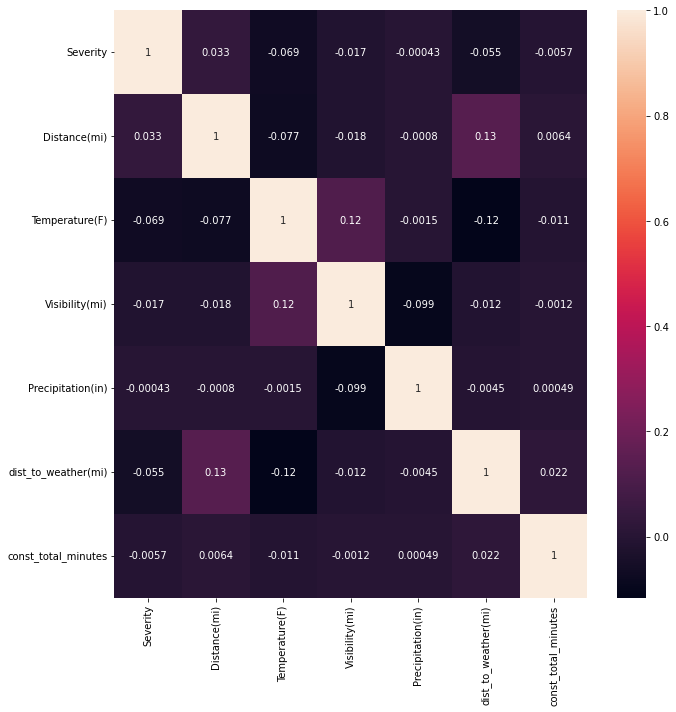

In [44]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize = (10, 10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df1.corr(), annot = True, ax = ax)
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.
plt.tight_layout()

In [45]:
#export seaborn heatmap
corr.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Corr_heat_w_coeff.png'))

## c) scatterplots

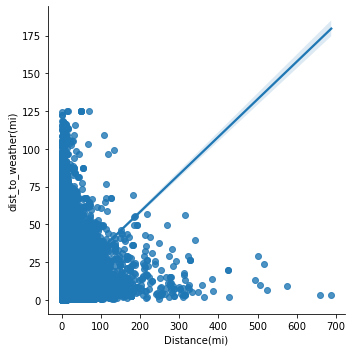

In [46]:
#create a scatterplot for distance and distance to weather
scatter=sns.lmplot(x = 'Distance(mi)', y = 'dist_to_weather(mi)', data = df1)
plt.tight_layout()

In [47]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_dist_dist.png'))

Distance of construction (x-axis) is mainly short (close to 0 miles), as is distance from construction to the weather station (y-axis). 
There is also very little variation in the jobs' distance and distance from the weather station. 


## d) pair plots

In [48]:
#create pairplots
sub_1 = df1[['Severity', 'Distance(mi)', 'Temperature(F)', 'Visibility(mi)', 'dist_to_weather(mi)', 'const_total_minutes']]

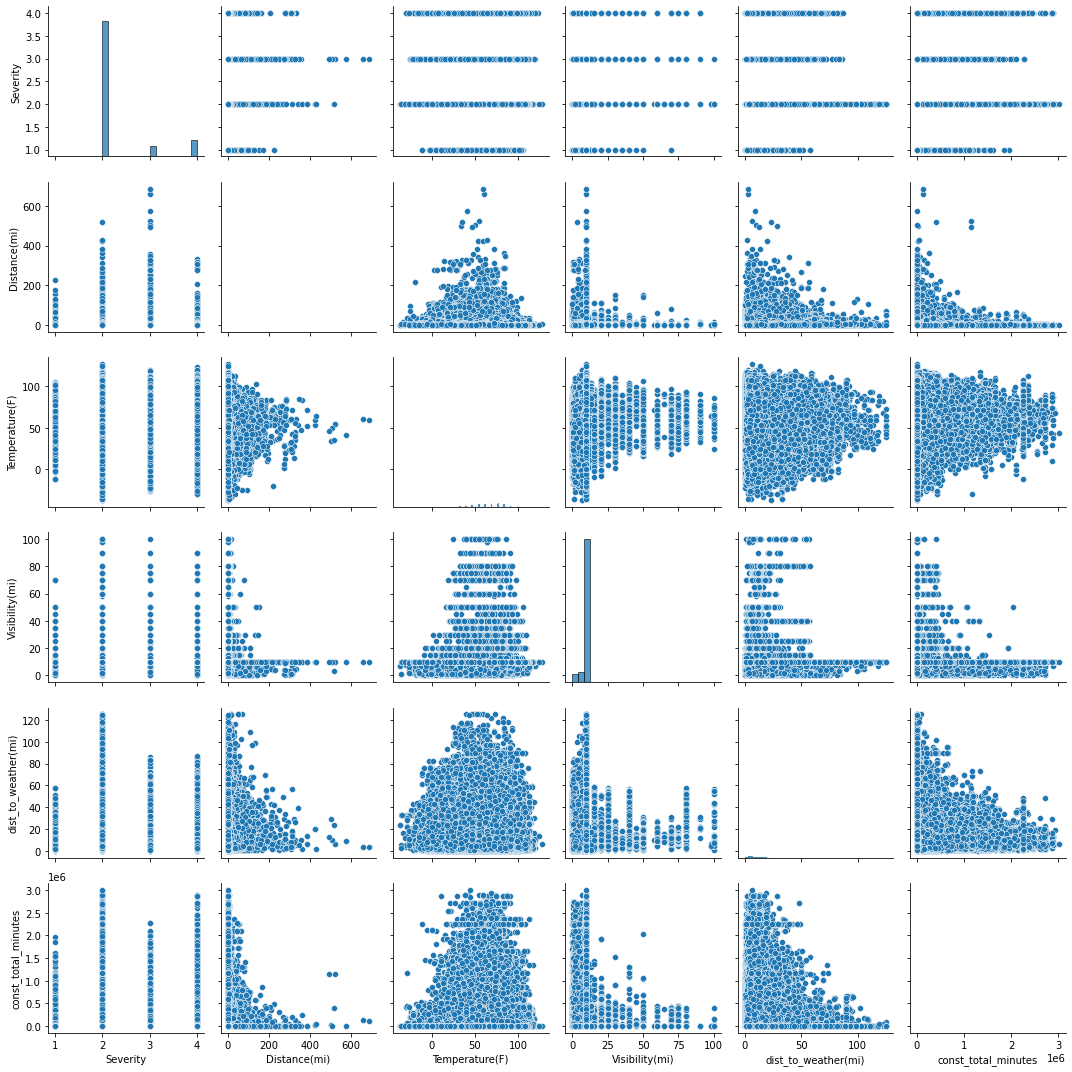

In [49]:
g = sns.pairplot(sub_1)
plt.tight_layout()

Severity is categorical data. All of the remaining data is continuous. Looking at all of the data, Severity and Visibility are the only two that bars are evident in the count. 

In [50]:
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pairplot_construction.png'))

## e) categorical plot

<AxesSubplot:xlabel='Distance(mi)', ylabel='Count'>

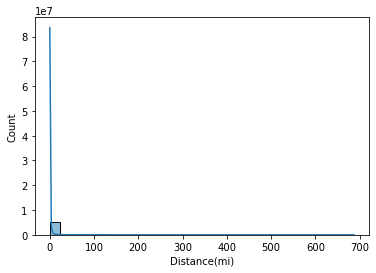

In [51]:
sns.histplot(df1['Distance(mi)'], bins = 30, kde = True)

In [52]:
df1.loc[df1['Distance(mi)']<1, 'Distance_flag'] = 'Short_Dist'

C:\Users\erhil\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\erhil\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [53]:
df1.loc[(df1['Distance(mi)']>=1) &(df1['Distance(mi)']<5), 'Distance_flag'] = 'Medium_Dist'

In [54]:
df1.loc[df1['Distance(mi)']>=5, 'Distance_flag'] = 'Long_Dist'

In [55]:
df1['Distance_flag'].value_counts(dropna = False)

Short_Dist     3731172
Medium_Dist    1147535
Long_Dist       274943
Name: Distance_flag, dtype: int64

In [56]:
df1.columns

Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Visibility(mi)',
       'Precipitation(in)', 'dist_to_weather(mi)', 'const_total_minutes',
       'Distance_flag'],
      dtype='object')

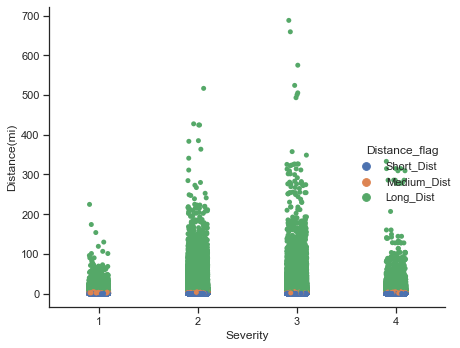

In [57]:
#create categorical plot in seaborn using Distance values as categories for hue
sns.set(style='ticks')
g = sns.catplot(x = 'Severity', y = 'Distance(mi)', hue = 'Distance_flag', data = df1)
plt.tight_layout()

Construction that are the longest distances are moderately severe in impacting traffic (you can see a handful of cases that are Severity-Level_3 at the farthest distances). Overall, a majority of construction are under 1 mile.

In [58]:
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'catplot_severity_distance.png'))

In [59]:
#making a subset of df1 only with short-distance construction (<1mile)
df2 = df1.loc[df1['Distance_flag']=='Short_Dist']

<AxesSubplot:xlabel='Distance(mi)', ylabel='Count'>

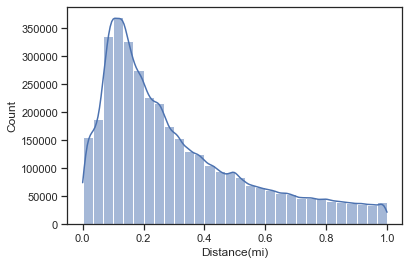

In [60]:
#histogram with only short-distance construction
sns.histplot(df2['Distance(mi)'], bins = 30, kde = True)

### Questions from previous section:
#### Is there a correlation between precipitation (rain) and the length of time that construction takes? (elevating question)
Not from this analysis, there is only a 0.00049 correlation coefficient between the variables.
#### Is there a correlation between visibility and the length of time that construction takes? (elevating question)
Not from this analysis, there is only a 0.0012 correlation coefficient between the variables.
#### Is there a correlation between temperature and the length of time that construction takes? (elevating question)
Not from this analysis, there is only a 0.011 correlation coefficient between the variables. 
#### Which states have the most road construction? (time-wise, length, and count) (clarifying question)
Not found using these visualization methods.
#### Which states have longer times and lengths of road construction? (clarifying question)
Not found using these visualization methods.
#### What is the typical distance from the start of the construction site to the airport weather stations? (clarifying question)
mean approximately 8.840478 miles;
median approximately 6.687495 miles

In [61]:
df.describe()

,Severity,Distance(mi),Temperature(F),Visibility(mi),Precipitation(in),Zipcode_no_ext,dist_to_weather(mi),project_time_length,const_total_minutes
count,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06,5.153650e+06,5153650,5.153650e+06
mean,2.258540e+00,1.344019e+00,6.380623e+01,8.952274e+00,2.761149e-03,5.128146e+04,8.840478e+00,18 days 19:48:05.805755533,2.710810e+04
std,6.317709e-01,4.030754e+00,1.781520e+01,2.558197e+00,4.918816e-02,2.942521e+04,7.591636e+00,78 days 05:05:13.177117362,1.126252e+05
min,1.000000e+00,4.657500e-05,-3.700000e+01,0.000000e+00,0.000000e+00,1.001000e+03,1.283714e-02,0 days 00:01:30,1.500000e+00
25%,2.000000e+00,1.569342e-01,5.200000e+01,1.000000e+01,0.000000e+00,2.811700e+04,4.206273e+00,0 days 02:07:25,1.274167e+02
50%,2.000000e+00,3.725871e-01,6.600000e+01,1.000000e+01,0.000000e+00,4.727400e+04,6.687495e+00,0 days 07:07:50,4.278333e+02
75%,2.000000e+00,1.134753e+00,7.700000e+01,1.000000e+01,0.000000e+00,8.022300e+04,1.071931e+01,1 days 10:00:00,2.040000e+03
max,4.000000e+00,6.877400e+02,1.270000e+02,1.000000e+02,2.400000e+01,9.940300e+04,1.250432e+02,2090 days 14:46:01,3.010486e+06


### Hypothesis:
Construction jobs that are closer to the weather station are quicker to be completed.
### Null Hypothesis:
Construction jobs that are greater than 6.7 miles (median distance) to the weather station are completed in less than 428 minutes (median construction time).
### Alternative Hypothesis:
Construction jobs that are closer than 6.7 miles to the weather station are completed in less than 428 minutes.